In [1]:
# Define ticket
ticket = 'AAPL'

# Use a new working directory for relative imports
from sys import path
import os

os.chdir(os.path.dirname(path[0]))
# print("New Working Directory " , os.getcwd())

In [2]:
from day_trading.files import DayTradingFiles
import pandas as pd
import json
import joblib
import os

# Prepare the models, targets, and features
files = DayTradingFiles()

high_regressor = joblib.load(os.path.join(files.output_directory, f'high_model_{ticket}.joblib'))
low_regressor = joblib.load(os.path.join(files.output_directory, f'low_model_{ticket}.joblib'))

with open(os.path.join(files.output_directory, f'target_high_{ticket}.json')) as json_file:
    targets_high = json.load(json_file)

with open(os.path.join(files.output_directory, f'target_low_{ticket}.json')) as json_file:
    targets_low = json.load(json_file)

features = pd.read_csv(os.path.join(files.output_directory, f'features_{ticket}.csv'))


/Users/juanbeleno/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/fixes.py:28: UserWarning: Module day_trading was already imported from None, but /Users/juanbeleno/Desktop/Repositories/nlp_public_projects/day_trading is being added to sys.path
  from pkg_resources import parse_version  # type: ignore
/Users/juanbeleno/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:310: UserWarning: Trying to unpickle estimator LinearRegression from version 1.0.2 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


In [3]:
import numpy as np

# Feature importance
sorted_idx = np.argsort(high_regressor.coef_)[::-1]
print(f'Feature Importance for high regressor:')
for index in sorted_idx:
    print([features.columns[index], high_regressor.coef_[index]])

print('--------------------------------------')
sorted_idx = np.argsort(low_regressor.coef_)[::-1]
print(f'Feature Importance for low regressor:')
for index in sorted_idx:
    print([features.columns[index], low_regressor.coef_[index]])

"""
sorted_idx = np.argsort(high_regressor.feature_importances_)[::-1]
print(f'Feature Importance for high regressor:')
for index in sorted_idx:
    print([features.columns[index], high_regressor.feature_importances_[index]])

print('--------------------------------------')
sorted_idx = np.argsort(low_regressor.feature_importances_)[::-1]
print(f'Feature Importance for low regressor:')
for index in sorted_idx:
    print([features.columns[index], low_regressor.feature_importances_[index]])
"""

Feature Importance for high regressor:
['Return_5', 11.127052277970984]
['ExpMovingAvg_10', 8.395287436169053]
['Return_50', 4.084249344522593]
['ExpMovingAvg_30', 3.0889948840295554]
['close', 1.3063549332976874]
['MovingAvg_30', 0.9609704260137016]
['MovingAvg_20', 0.6189478773999181]
['MovingAvg_50', 0.35295011822784317]
['high', 0.3176585653237728]
['Volatility_30', 0.20078962330347425]
['Volatility_5', 0.14623521992353014]
['open', 0.1378732269859368]
['Volatility_10', 0.12720702728666874]
['MovingAvg_10', 0.11408382870848452]
['hour', 0.05227644021496982]
['Volatility_20', 0.05220931519054801]
['minute', 0.00225303310612717]
['volume', 9.435601898306223e-08]
['day_of_week', -0.005117741643599478]
['MovingAvg_5', -0.04849384739782541]
['low', -0.22327397307871022]
['ExpMovingAvg_50', -0.31675462433644075]
['Volatility_50', -0.6402155823101747]
['ExpMovingAvg_5', -3.3723218863457016]
['Return_30', -5.242974705863721]
['Return_10', -6.316350478763201]
['Return_20', -9.98546032984981

"\nsorted_idx = np.argsort(high_regressor.feature_importances_)[::-1]\nprint(f'Feature Importance for high regressor:')\nfor index in sorted_idx:\n    print([features.columns[index], high_regressor.feature_importances_[index]])\n\nprint('--------------------------------------')\nsorted_idx = np.argsort(low_regressor.feature_importances_)[::-1]\nprint(f'Feature Importance for low regressor:')\nfor index in sorted_idx:\n    print([features.columns[index], low_regressor.feature_importances_[index]])\n"

In [4]:
# Make predictions
high_predictions = high_regressor.predict(features)
low_predictions = low_regressor.predict(features)

print(f'Sample High Predictions: {high_predictions[:20]}')

Sample High Predictions: [148.21025672 147.00095026 147.31558692 147.12352852 146.75367053
 146.11869291 146.21046051 146.37247521 146.27927088 146.30177452
 146.05594386 145.89253561 145.77387851 145.51502051 145.70581919
 146.15475996 145.84873074 145.48805429 145.34729992 145.08411784]


In [5]:
from sklearn.metrics import mean_absolute_error

low_mae = mean_absolute_error(targets_low, low_predictions)
high_mae = mean_absolute_error(targets_high, high_predictions)

print(f'MAE Low: {low_mae}')
print(f'MAE High: {high_mae}')

MAE Low: 0.3714956789216698
MAE High: 0.3695718843609659


Sample High Deltas: [-1.6402494  -0.43094293 -0.76558387 -0.57352547 -0.73366626 -0.1586862
 -0.2504538  -0.41246849 -0.31926416 -0.51178124 -0.26894129 -0.10553305
  0.01312405  0.27198206  0.08118337 -0.45476301 -0.42873258 -0.30806161
 -0.16730725 -0.2842216 ]


<AxesSubplot:xlabel='x', ylabel='delta_high'>

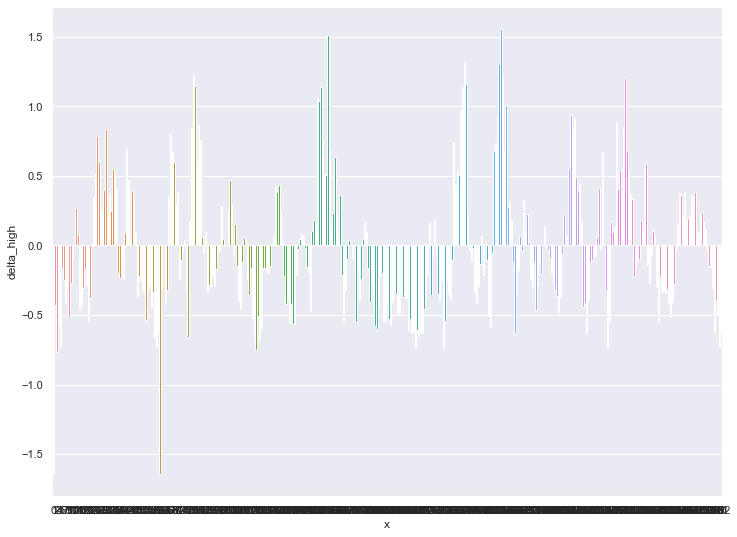

In [6]:
import seaborn as sns
sns.set(rc={'figure.figsize':(12, 9)})

# Analyze the errors
delta_high_values = targets_high - high_predictions
delta_low_values = targets_low - low_predictions

df = features.copy()
df['x'] = df.index
df['delta_low'] = delta_low_values
df['delta_high'] = delta_high_values
df['target_low'] = targets_low
df['targets_high'] = targets_high
df['high_predictions'] = high_predictions
df['low_predictions'] = low_predictions

print(f'Sample High Deltas: {delta_high_values[:20]}')

sns.barplot(data=df, x="x", y="delta_high")

<AxesSubplot:xlabel='x', ylabel='delta_low'>

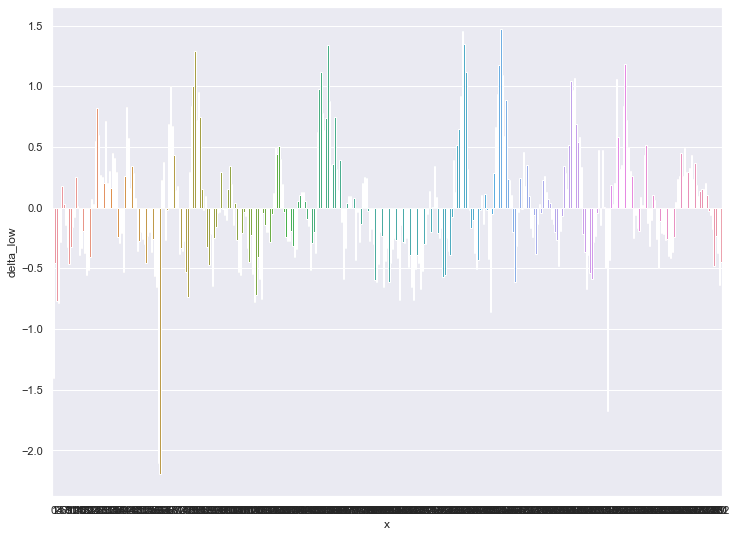

In [7]:
sns.barplot(data=df, x="x", y="delta_low")

In [8]:
df.describe()

,high,low,close,open,volume,day_of_week,hour,minute,Return_5,MovingAvg_5,...,MovingAvg_50,ExpMovingAvg_50,Volatility_50,x,delta_low,delta_high,target_low,targets_high,high_predictions,low_predictions
count,383.000000,383.000000,383.000000,383.000000,3.830000e+02,383.000000,383.000000,383.000000,383.000000,383.000000,...,383.000000,383.000000,383.000000,383.00000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000
mean,145.357555,144.926581,145.153286,145.136890,8.948558e+05,2.036554,16.180157,28.446475,0.000677,145.114123,...,144.729987,144.732247,0.342160,191.00000,-0.007862,-0.021213,145.396502,145.793256,145.814469,145.404365
std,1.881676,1.923867,1.905125,1.905707,7.658210e+05,1.402586,1.869127,17.278944,0.005474,1.852212,...,1.463139,1.450719,0.126779,110.70682,0.486920,0.470043,1.909489,1.876719,1.876746,1.898941
min,141.740005,140.639999,141.290100,141.300003,2.876820e+05,0.000000,13.000000,0.000000,-0.026430,141.884000,...,142.328769,142.341216,0.169937,0.00000,-2.194712,-1.643901,142.000000,142.820007,142.626763,141.983345
25%,143.748299,143.339996,143.585449,143.570801,5.297260e+05,1.000000,15.000000,15.000000,-0.002152,143.610400,...,143.742665,143.782284,0.255719,95.50000,-0.313292,-0.349143,143.830002,144.339996,144.254898,143.840151
50%,145.179993,144.729996,144.940002,144.929993,6.947890e+05,2.000000,16.000000,30.000000,0.000653,144.832977,...,144.228766,144.164824,0.283601,191.00000,-0.057176,-0.099606,145.040100,145.360001,145.496637,145.134543
75%,146.312500,145.940048,146.147499,146.135002,9.610725e+05,3.000000,18.000000,45.000000,0.003183,146.074001,...,145.163072,145.226152,0.478549,286.50000,0.258758,0.236678,146.259995,146.535004,146.811801,146.382471
max,150.229996,150.000000,150.209900,150.201096,8.262616e+06,4.000000,19.000000,55.000000,0.025792,150.035977,...,148.735247,148.763970,0.613187,382.00000,1.469358,1.554660,150.000000,150.229996,150.934828,150.569431


In [9]:
print(df.tail(10))

           high         low       close        open   volume  day_of_week  \
373  149.460007  149.250000  149.445099  149.320007   536519            0   
374  149.660004  149.274994  149.505295  149.449997   918315            0   
375  149.690002  149.419998  149.664993  149.509995   744212            0   
376  149.729996  149.520004  149.690002  149.666397   535734            0   
377  149.869995  149.580002  149.789703  149.684906   807250            0   
378  150.089996  149.720001  150.079895  149.785004  1609142            0   
379  150.149994  149.770004  149.848495  150.070007  1059371            0   
380  150.069901  149.830002  150.031601  149.839996   784439            0   
381  150.229996  150.000000  150.209900  150.029999   894904            0   
382  150.205002  149.890106  150.009995  150.201096   784361            0   

     hour  minute  Return_5  MovingAvg_5  ...  MovingAvg_50  ExpMovingAvg_50  \
373    18      35  0.002534   149.295020  ...    148.260333       148.27

In [10]:
'''
table = pd.pivot_table(
    df, values='delta_low', index=['hour'],
    columns=['day_of_week'], aggfunc=np.mean)
print(table)'''

"\ntable = pd.pivot_table(\n    df, values='delta_low', index=['hour'],\n    columns=['day_of_week'], aggfunc=np.mean)\nprint(table)"

In [11]:
'''table = pd.pivot_table(
    df, values='delta_high', index=['hour'],
    columns=['day_of_week'], aggfunc=np.mean)
print(table)'''

"table = pd.pivot_table(\n    df, values='delta_high', index=['hour'],\n    columns=['day_of_week'], aggfunc=np.mean)\nprint(table)"

In [12]:
'''print(df.groupby('hour')['delta_high'].mean())
print(df.groupby('hour')['delta_high'].std())'''

"print(df.groupby('hour')['delta_high'].mean())\nprint(df.groupby('hour')['delta_high'].std())"

In [13]:
'''print(df.groupby('hour')['delta_low'].mean())
print(df.groupby('hour')['delta_low'].std())'''

"print(df.groupby('hour')['delta_low'].mean())\nprint(df.groupby('hour')['delta_low'].std())"